In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
max_scores = {"Cell Cycle Transcription by Coupled CDK and Network Oscillators": 90,
              "Metabolic Interactions in the Gut Microbiome": 120,
              "Mammalian Cell Cycle 2006": 100,
              "T-LGL Survival Network 2011 Reduced Network": 180,
              "IL-1 Signaling": 1180,
              "Glucose Repression Signaling 2009": 730,
              "Signaling in Macrophage Activation": 3200,
              "Influenza A Virus Replication Cycle": 1310,
              "ABA_GA_base_A": 505}

In [56]:
df_raw = pd.read_csv("log.csv")
df_raw["max"] = df_raw["sample_model"].apply(lambda x: max_scores[x])

df_raw.head()

,sample_model,hierarchy,seed,total_iter,per_iter,keep,mix,prob,start_t_h_score,start_t_nh_score,final_t_h_score,final_t_nh_score,start_v_h_score,start_v_nh_score,final_v_h_score,final_v_nh_score,max
0,Cell Cycle Transcription by Coupled CDK and Ne...,True,1,5,5,1,0,0.2,1.0,15.0,65.00,66.0,0.0,3.5,14.0,14.0,90
1,Cell Cycle Transcription by Coupled CDK and Ne...,False,1,5,5,1,0,0.2,1.0,15.0,69.50,69.5,0.0,3.5,16.5,16.5,90
2,Cell Cycle Transcription by Coupled CDK and Ne...,True,2,5,5,1,0,0.2,4.5,16.5,68.50,68.5,0.0,7.5,17.0,17.0,90
3,Cell Cycle Transcription by Coupled CDK and Ne...,False,2,5,5,1,0,0.2,4.5,16.5,68.50,68.5,0.0,7.5,17.0,17.0,90
4,Cell Cycle Transcription by Coupled CDK and Ne...,True,3,5,5,1,0,0.2,3.5,18.0,60.75,61.5,0.0,3.5,16.0,16.5,90


In [55]:
# df_per = df_raw.groupby(["sample_model", "hierarchy"]).mean().reset_index()
df_per = df_raw.copy()
df_per.drop(columns=["seed", "total_iter", "per_iter", "keep", "mix", "prob"], axis=1, inplace=True)

df_per.iloc[:,2:6] = df_per.iloc[:,2:6].div(df_per["max"]*0.8, axis=0)
df_per.iloc[:,6:10] = df_per.iloc[:,6:10].div(df_per["max"]*0.2, axis=0)

In [ ]:
df = df_per.groupby(["sample_model", "hierarchy"]).mean().reset_index()
df.drop("max", axis=1, inplace=True)

df["final_t_h_std"] = [df_per[df_per["hierarchy"] == False].iloc[:,4].std(), df_per[df_per["hierarchy"] == True].iloc[:,4].std()]
df["final_t_nh_std"] = [df_per[df_per["hierarchy"] == False].iloc[:,5].std(), df_per[df_per["hierarchy"] == True].iloc[:,5].std()]
df["final_v_h_std"] = [df_per[df_per["hierarchy"] == False].iloc[:,8].std(), df_per[df_per["hierarchy"] == True].iloc[:,8].std()]
df["final_v_nh_std"] = [df_per[df_per["hierarchy"] == False].iloc[:,9].std(), df_per[df_per["hierarchy"] == True].iloc[:,9].std()]

df_h = df[df["hierarchy"] == True]
df_nh = df[df["hierarchy"] == False]

,sample_model,hierarchy,start_t_h_score,start_t_nh_score,final_t_h_score,final_t_nh_score,start_v_h_score,start_v_nh_score,final_v_h_score,final_v_nh_score,final_t_h_std,final_t_nh_std,final_v_h_std,final_v_nh_std
1,Cell Cycle Transcription by Coupled CDK and Ne...,True,0.282153,0.439722,0.883333,0.891944,0.257083,0.454444,0.896944,0.9,0.051696,0.047612,0.070697,0.06898


In [58]:
df_h.head()

,sample_model,hierarchy,start_t_h_score,start_t_nh_score,final_t_h_score,final_t_nh_score,start_v_h_score,start_v_nh_score,final_v_h_score,final_v_nh_score,final_t_h_std,final_t_nh_std,final_v_h_std,final_v_nh_std
1,Cell Cycle Transcription by Coupled CDK and Ne...,True,0.282153,0.439722,0.883333,0.891944,0.257083,0.454444,0.896944,0.9,0.051696,0.047612,0.070697,0.06898


In [59]:
df_nh.head()

,sample_model,hierarchy,start_t_h_score,start_t_nh_score,final_t_h_score,final_t_nh_score,start_v_h_score,start_v_nh_score,final_v_h_score,final_v_nh_score,final_t_h_std,final_t_nh_std,final_v_h_std,final_v_nh_std
0,Cell Cycle Transcription by Coupled CDK and Ne...,False,0.282153,0.439722,0.879861,0.888889,0.257083,0.454444,0.901667,0.903333,0.057798,0.053228,0.090003,0.089695


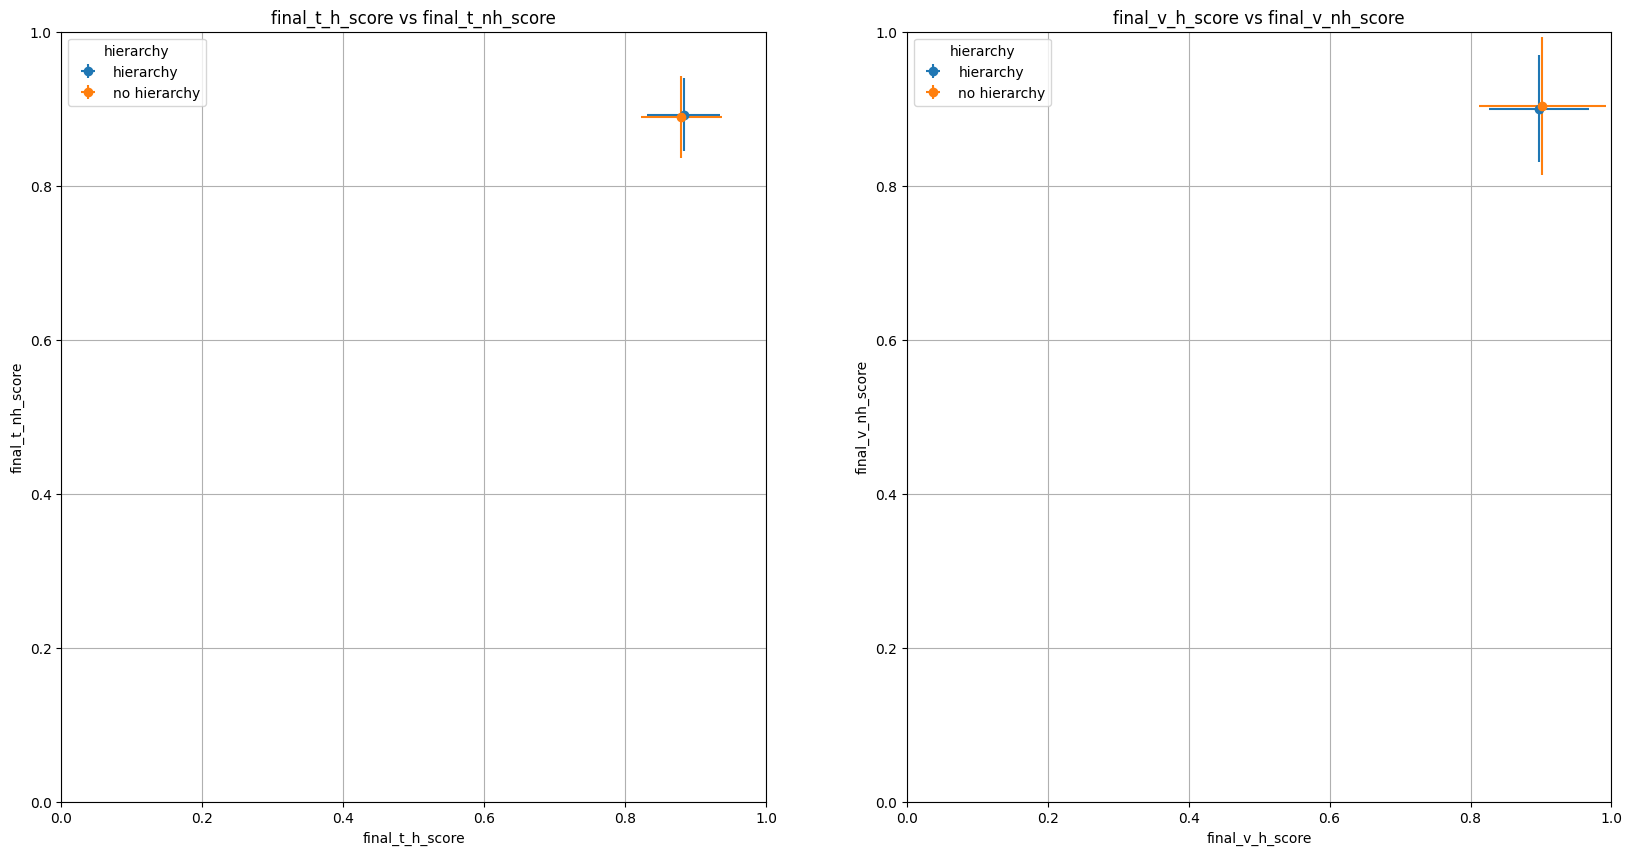

In [63]:
# errorbar plot final_t_h_score vs final_t_nh_score for each hierarchy
# errorbar plot final_v_h_score vs final_v_nh_score for each hierarchy

fig, ax= plt.subplots(1, 2, figsize=(20,10)) 

ax[0].errorbar(df_h["final_t_h_score"], df_h["final_t_nh_score"], xerr=df_h["final_t_h_std"], yerr=df_h["final_t_nh_std"], color = "C0", fmt="o", label="hierarchy")
ax[0].errorbar(df_nh["final_t_h_score"], df_nh["final_t_nh_score"], xerr=df_nh["final_t_h_std"], yerr=df_nh["final_t_nh_std"], color = "C1", fmt="o", label="no hierarchy")

ax[0].legend(title="hierarchy", loc="upper left")
ax[0].grid()
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("final_t_h_score")
ax[0].set_ylabel("final_t_nh_score")
ax[0].set_title("final_t_h_score vs final_t_nh_score")


ax[1].errorbar(df_h["final_v_h_score"], df_h["final_v_nh_score"], xerr=df_h["final_v_h_std"], yerr=df_h["final_v_nh_std"], color = "C0", fmt="o", label="hierarchy")
ax[1].errorbar(df_nh["final_v_h_score"], df_nh["final_v_nh_score"], xerr=df_nh["final_v_h_std"], yerr=df_nh["final_v_nh_std"], color = "C1", fmt="o", label="no hierarchy")

ax[1].legend(title="hierarchy", loc="upper left")
ax[1].grid()
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("final_v_h_score")
ax[1].set_ylabel("final_v_nh_score")
ax[1].set_title("final_v_h_score vs final_v_nh_score")

plt.show()